In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
import xgboost as xgb


In [ ]:
import pickle
%matplotlib inline  

In [ ]:
df = pd.read_csv('audit_data (1).csv')


In [ ]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


# Handling Missing Values

In [ ]:
df.shape

(776, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

# Handling Categorical Data

In [ ]:
df.value_counts() 

Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  TOTAL  numbers  Score_B.1  Risk_C  Money_Value  Score_MV  Risk_D  District_Loss  PROB  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk
55.57         12           0.00    0.2      0.000   0.00    0.2      0.000   0.00   5.0      0.2        1.0     0.00         0.2       0.000   2              0.2   0.4     0        0.2   0.0     2.0    1.400          0.4           0.5             0.2800      0       4
              8            0.00    0.2      0.000   0.00    0.2      0.000   0.00   5.0      0.2        1.0     0.00         0.2       0.000   2              0.2   0.4     0        0.2   0.0     2.0    1.400          0.4           0.5             0.2800      0       3
              5            0.00    0.2      0.000   0.00    0.2      0.000   0.00   5.0      0.2        1.0     0.00         0.2       0.000   2              0.2   0.4     0        0.2   0.0     2.0

In [ ]:
cols_del=['LOCATION_ID','TOTAL']

df.drop(cols_del, axis=1, inplace=True)


In [ ]:
df.isna().sum()


Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)

In [ ]:
df.isna().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

# Handling Outliers

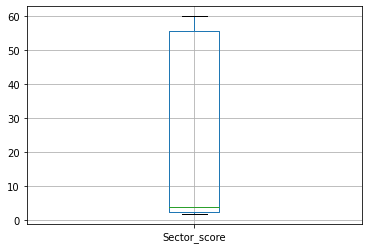

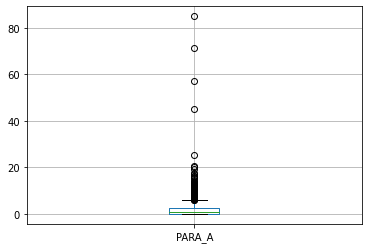

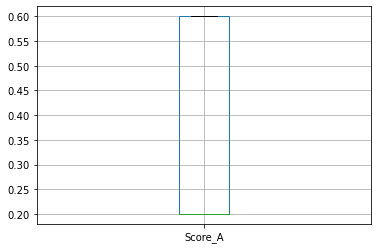

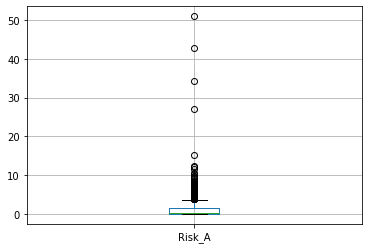

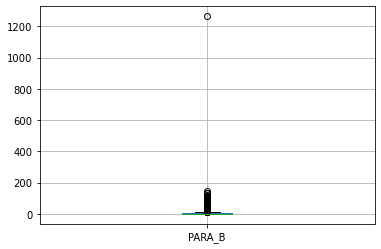

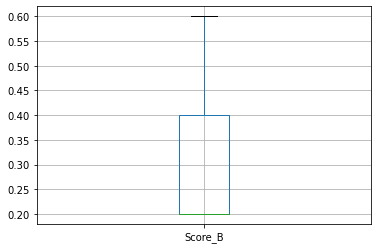

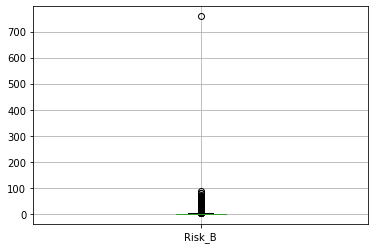

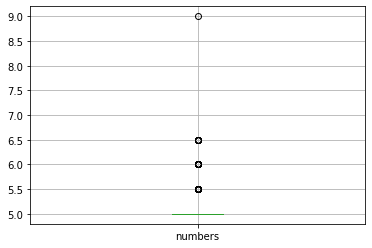

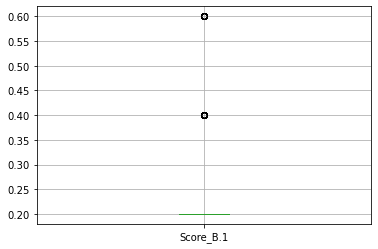

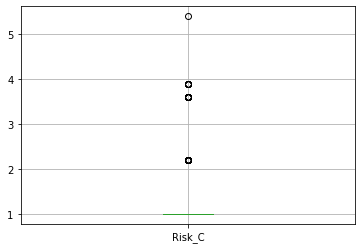

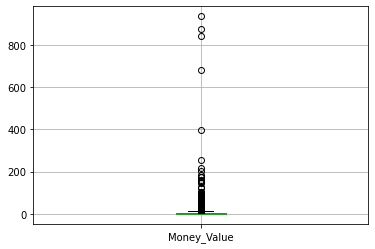

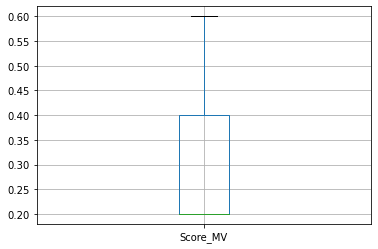

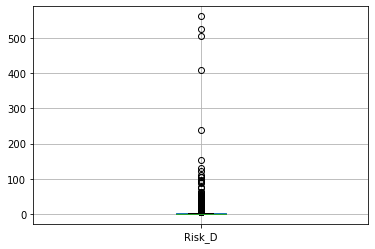

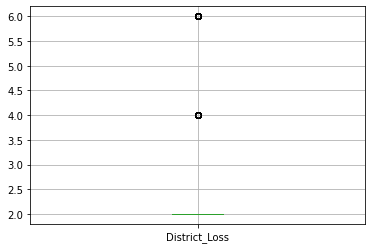

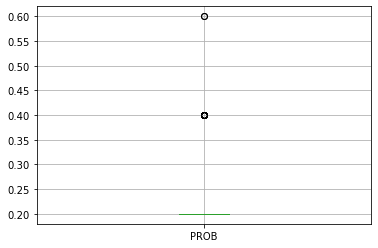

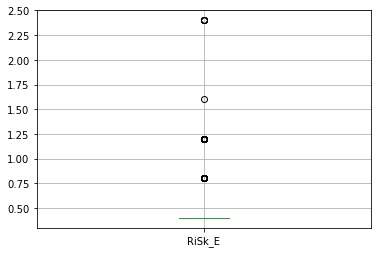

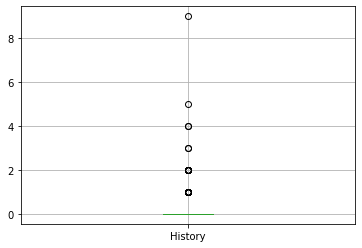

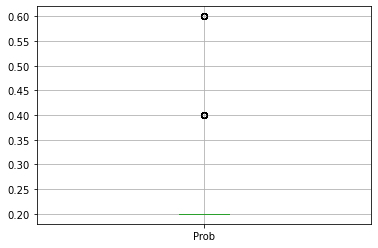

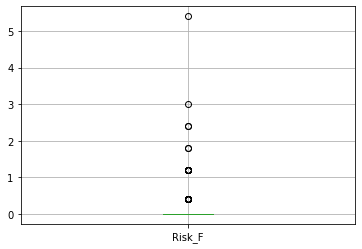

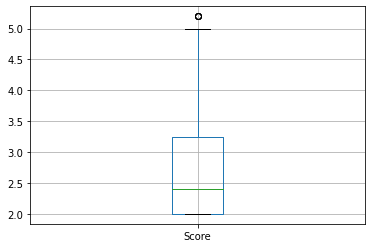

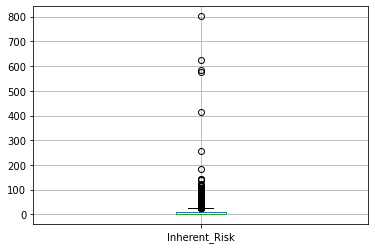

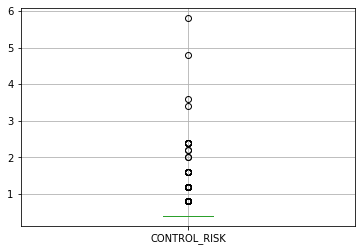

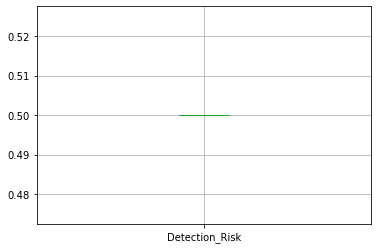

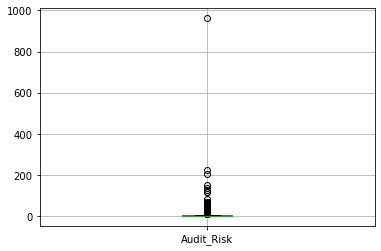

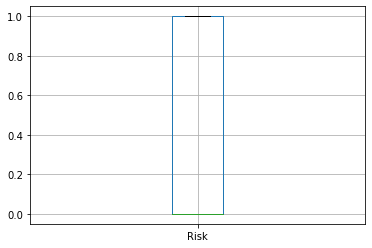

In [ ]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [ ]:
def iqr(df):
    iqr=df.quantile (0.75)-df.quantile (0.25)
    upper_range=df.quantile(0.75)+ (1.5*iqr)
    lower_range=df.quantile (0.25)+(1.5 *iqr)
    return upper_range, lower_range

upper,lower=iqr(df)


In [ ]:
upper,lower

(Sector_score      135.37000
 PARA_A              5.88500
 Score_A             1.20000
 Risk_A              3.65700
 PARA_B             10.40000
 Score_B             0.70000
 Risk_B              4.60125
 numbers             5.00000
 Score_B.1           0.20000
 Risk_C              1.00000
 Money_Value        14.07500
 Score_MV            0.70000
 Risk_D              5.58750
 District_Loss       2.00000
 PROB                0.20000
 RiSk_E              0.40000
 History             0.00000
 Prob                0.20000
 Risk_F              0.00000
 Score               5.12500
 Inherent_Risk      24.28350
 CONTROL_RISK        0.40000
 Detection_Risk      0.50000
 Audit_Risk          7.64970
 Risk                2.50000
 dtype: float64,
 Sector_score      82.17000
 PARA_A             3.61500
 Score_A            0.80000
 Risk_A             2.21100
 PARA_B             6.24000
 Score_B            0.50000
 Risk_B             2.76075
 numbers            5.00000
 Score_B.1          0.20000
 Risk_

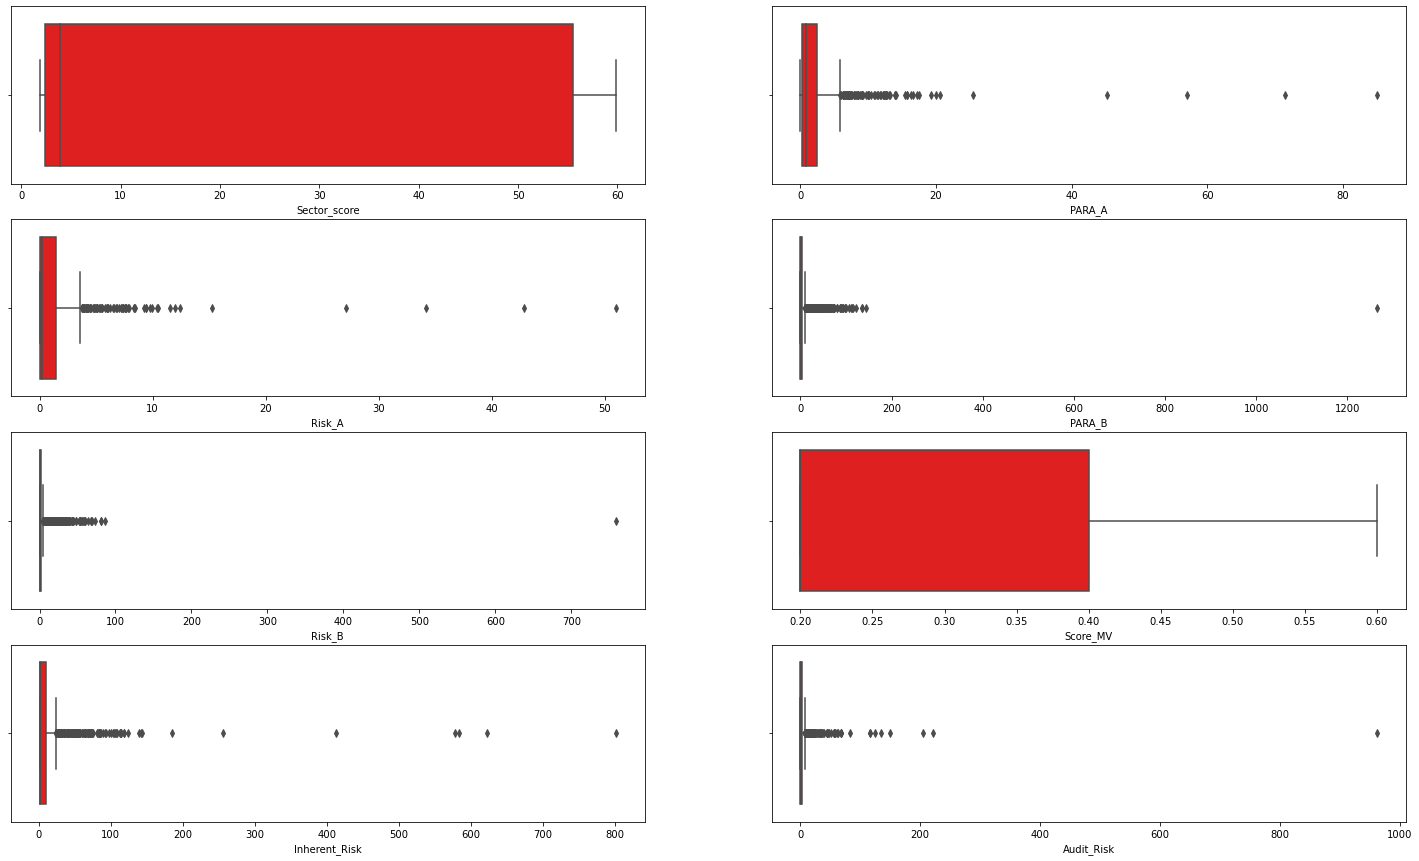

In [ ]:
r=['Sector_score', 'PARA_A',
   'Risk_A', 'PARA_B',
   'Risk_B', 'Score_MV',
   'Inherent_Risk',
   'Audit_Risk','Risk']

fig, ax = plt.subplots(4, 2, figsize=(25,15))
for i, subplot in zip(r,ax. flatten()): 
    sns.boxplot(df[i],ax=subplot,color='r')

# Descriptive Statistical

In [ ]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,5.067655,0.223711,1.152964,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,0.264449,0.080352,0.537417,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,9.000000,0.600000,5.400000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


# Visual Analysis

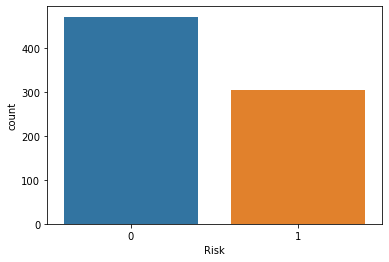

In [ ]:
sns.countplot(df['Risk'])
plt.show()

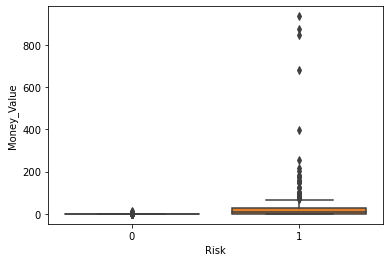

In [ ]:
sns.boxplot(x='Risk',y='Money_Value',data=df)
plt.show()

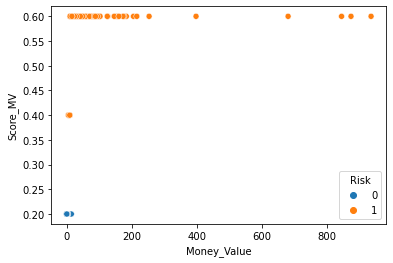

In [ ]:
sns.scatterplot(x='Money_Value',y='Score_MV',hue='Risk',data=df)
plt.show()

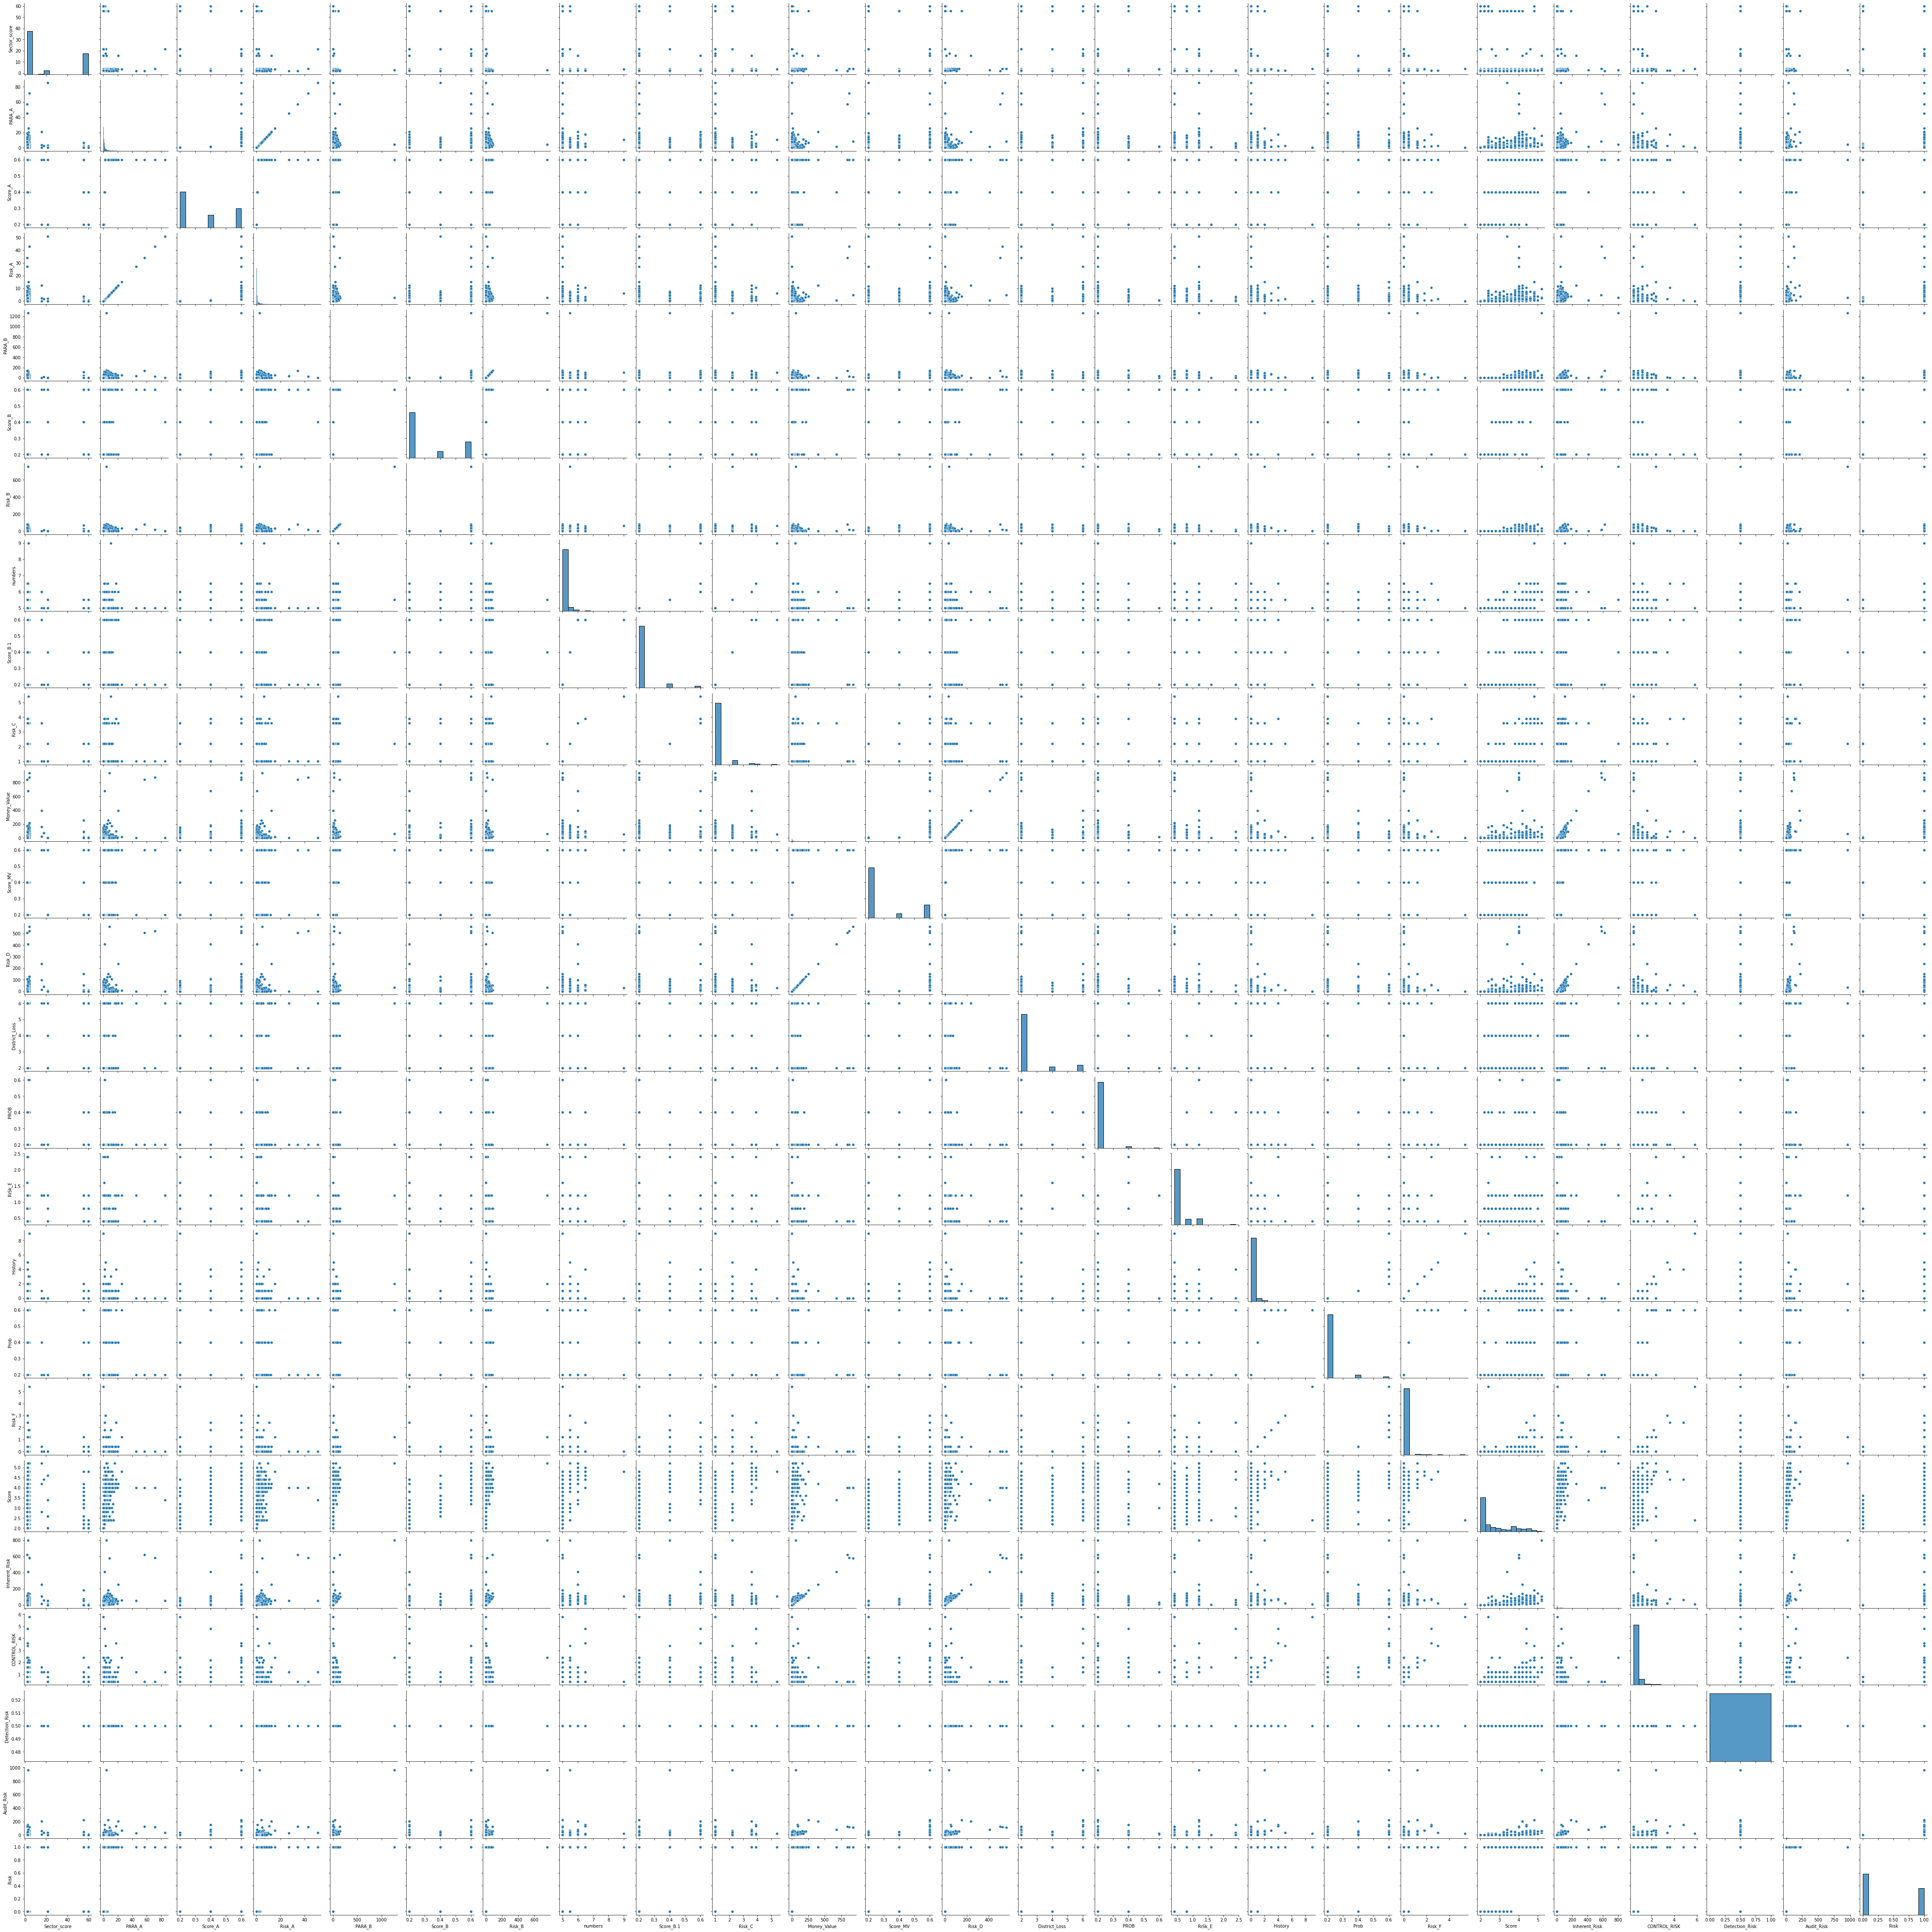

In [83]:
sns.pairplot(df)

In [ ]:
print(df.dtypes)

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object


In [22]:
df.head()


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [ ]:

X=df.drop(['Risk'],axis=1)


<AxesSubplot:title={'center':'Correlation with Churn'}>

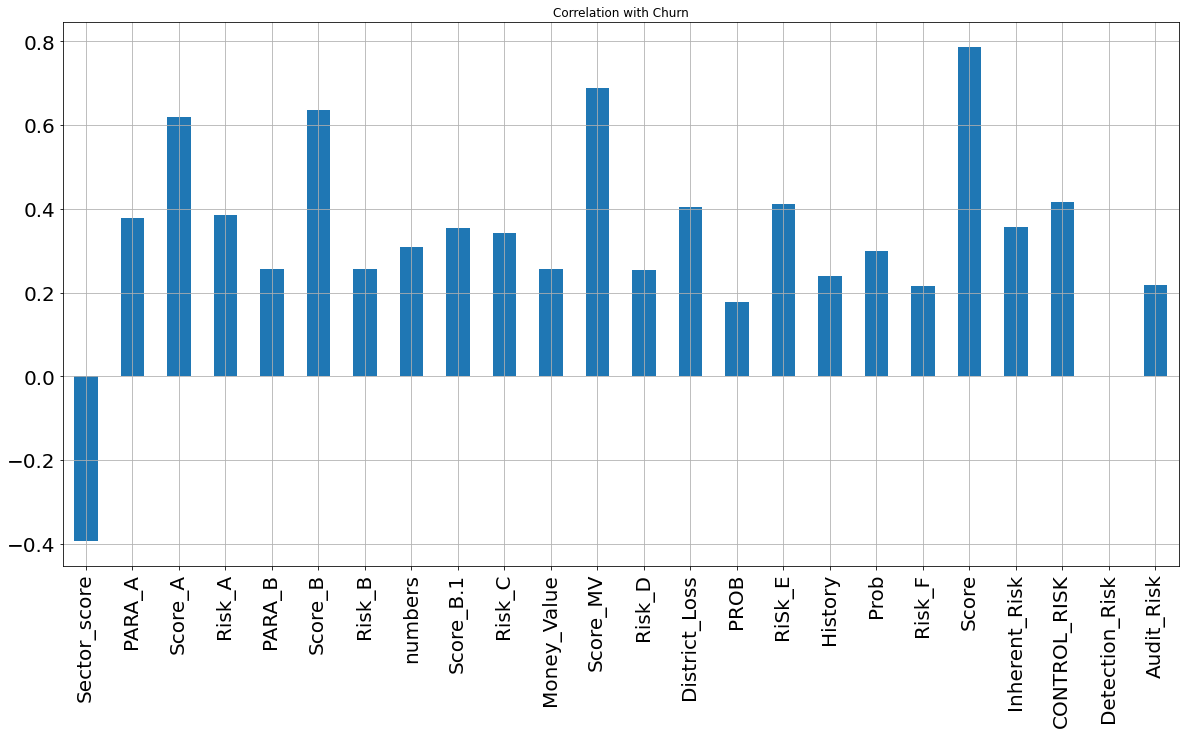

In [ ]:
X.corrwith(df.Risk).plot.bar(
        figsize = (20, 10), title = "Correlation with Churn", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,nan,0.25


As we have seen there is no correlation of Detection_Risk so it will be deleted before model building process as it is not contributing well enough for prediction process.

In [ ]:
X = X.drop(['Detection_Risk'],axis=1)


In [ ]:
X.columns



Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk'],
      dtype='object')

In [ ]:
import itertools

In [ ]:
print(df.dtypes)

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object


In [ ]:
y=df['Risk']


In [ ]:
df

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=72,stratify=y)

In [ ]:
len(x_train),len(x_test)

(543, 233)

In [ ]:
len(y_train),len(y_test)

(543, 233)

In [ ]:
x_train

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
44,3.89,1.32,0.4,0.528,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.2,1.940,0.4,0.3880
717,55.57,1.06,0.4,0.424,0.63,0.2,0.126,5.0,0.2,1.0,...,6,0.2,1.2,0,0.2,0.0,2.6,2.930,1.2,1.7580
636,55.57,1.67,0.4,0.668,0.00,0.2,0.000,5.0,0.2,1.0,...,4,0.2,0.8,0,0.2,0.0,2.4,2.480,0.8,0.9920
608,55.57,2.42,0.6,1.452,3.53,0.6,2.118,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,3.8,7.494,0.4,1.4988
40,3.89,0.00,0.2,0.000,3.71,0.2,0.742,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.4,19.920,0.4,3.9840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1.85,1.04,0.4,0.416,0.91,0.2,0.182,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.2,2.072,0.4,0.4144
374,1.99,0.60,0.2,0.120,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.520,0.4,0.3040
476,1.85,0.00,0.2,0.000,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.2800
503,21.61,0.33,0.2,0.066,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.466,0.4,0.2932


In [38]:
x_test

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
216,2.72,5.45,0.6,3.270,71.09,0.6,42.654,5.5,0.4,2.2,...,2,0.2,0.4,0,0.2,0.0,4.4,84.032,0.4,16.8064
351,1.99,0.30,0.2,0.060,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.460,0.4,0.2920
368,1.99,1.27,0.4,0.508,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.6,107.448,0.4,21.4896
752,55.57,0.51,0.2,0.102,0.37,0.2,0.074,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.576,0.4,0.3152
72,3.89,4.24,0.6,2.544,8.06,0.4,3.224,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,3.4,13.582,0.4,2.7164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,55.57,0.82,0.2,0.164,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.564,0.4,0.3128
567,59.85,0.29,0.2,0.058,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.466,0.4,0.2932
331,2.37,0.02,0.2,0.004,0.05,0.2,0.010,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.414,0.4,0.2828
727,55.57,0.47,0.2,0.094,0.46,0.2,0.092,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.670,0.4,0.3340


In [ ]:
y_train

44     0
717    1
636    0
608    1
40     1
      ..
434    0
374    0
476    0
503    0
635    0
Name: Risk, Length: 543, dtype: int64

In [ ]:
y_test

216    1
351    0
368    1
752    0
72     1
      ..
713    0
567    0
331    0
727    0
609    0
Name: Risk, Length: 233, dtype: int64

In [ ]:
print(df.dtypes)

Sector_score      float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object


In [ ]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,5.067655,0.223711,1.152964,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,0.264449,0.080352,0.537417,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,9.000000,0.600000,5.400000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


# Training on multiple Algorithms

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
logi=LogisticRegression()
logi


LogisticRegression()

In [ ]:
logi.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Train

In [ ]:
y_train_pred=logi.predict(x_train)

In [ ]:
y_train_pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [ ]:
#Test

In [ ]:
y_test_pred=logi.predict(x_test)

In [ ]:
y_test_pred[:5]

array([1, 0, 1, 0, 1], dtype=int64)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy')

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
##with RandomForestClassification checking training data

In [ ]:
xy_train_pred=rfc.predict(x_train)

In [ ]:
xy_train_pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [ ]:
#Testing

In [ ]:
rfc.fit(x_test,y_test)

RandomForestClassifier(criterion='entropy')

In [ ]:
xy_test_pred=rfc.predict(x_test)

In [ ]:
xy_test_pred[:5]

array([1, 0, 1, 0, 1], dtype=int64)

# XGBClassifier

In [ ]:
model=xgb.XGBClassifier()

In [57]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#Evaluation of model with XG Boost

In [ ]:
Xg_train_pred=model.predict(x_train)

In [ ]:
Xg_train_pred[:5]

array([0, 1, 0, 1, 1])

In [ ]:
#Test

In [ ]:
Xg_test_pred=model.predict(x_test)

In [ ]:
Xg_test_pred[:5]

array([1, 0, 1, 0, 1])

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Knn train

In [ ]:
knn_train_pred=knn.predict(x_train)

In [ ]:
knn_train_pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [ ]:
#Knn test
knn_test_pred=knn.predict(x_test)

In [ ]:
knn_test_pred[:5]

array([1, 0, 1, 0, 1], dtype=int64)

# Testing the Model

In [ ]:
knn.predict([[2.37 ,0.50 ,0.100 ,0.04 ,0.008 ,0.54 ,5.0 ,0.000 ,0.2 ,6 ,0 ,2.4 ,2.3080 ,1.38480 , 1.85 ,1.75 ,0.700 ,0.00 ,0.000 ,1.75 ,5.0 ,0.350 ,0.2]])

array([0], dtype=int64)

In [ ]:
knn.predict([[6,0,2.6,2.9700,1.78200,3.89,0.00,0.000,0.84,0.168,0.84,5.0,0.07,0.2,2,0,2.0,1.5694,0.31388,21.00,0.21,0.138,0.127]])

array([0], dtype=int64)

In [ ]:
knn.predict([[55.65,0.71,1.145,0.154,0.56,2,0,0.00,0.00,0.30840,1.19,0.27,0.650,1.32440,0.100,6.0,1.6200,0.71,2.50,0.27,21.61,5.46,0]])

array([1], dtype=int64)

In [ ]:
knn.predict([[75.85,0.21,2.145,0.54,0.16,2.7,7,0.00,6.00,0.30840,2.19,0.15,0.90,1.320,0.100,6.0,1.200,0.71,2.50,0.27,0.61,9.46,0]])

array([0], dtype=int64)

In [ ]:
knn.predict([[57.37 ,8.50 ,0.00 ,8.04 ,0.0 ,1.59 ,9.0 ,1.100 ,9.000 ,2.78 ,8 ,2.4 ,1.080 ,1.38480 , 1.85 ,1.75 ,0.7 ,0.00 ,1.000 ,1.85 ,5.0 ,0.350 ,0.100]])

array([1], dtype=int64)

On The Top Of The Data We Have Used #4 Algorithms
1.Logistic Regression 
-->Training Accuracy

# Compare Model

In [ ]:
#CONFUSION MATRIX FOR TESTING DATA
#Logistic Regression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
confusion_matrix(y_test,y_test_pred)

array([[140,   1],
       [  1,  91]], dtype=int64)

In [ ]:
#ACCURACY FOR TESTING DATA

In [ ]:
accuracy_score(y_test,y_test_pred)*100

99.14163090128756

In [ ]:
# Classification Report For Testing Data

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.99      0.99      0.99        92

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



In [ ]:
#RandomForest
confusion_matrix(y_test,xy_test_pred)

array([[141,   0],
       [  0,  92]], dtype=int64)

In [ ]:
accuracy_score(y_test,xy_test_pred)*100

100.0

In [ ]:
print(classification_report(y_test,xy_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        92

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [ ]:
#XGBoost
confusion_matrix(y_test,Xg_test_pred)


array([[141,   0],
       [  0,  92]], dtype=int64)

In [ ]:
accuracy_score(y_test,Xg_test_pred)*100

100.0

In [ ]:
print(classification_report(y_test,Xg_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        92

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [ ]:
#Knn
confusion_matrix(y_test,knn_test_pred)

array([[141,   0],
       [  4,  88]], dtype=int64)

In [ ]:
accuracy_score(y_test,knn_test_pred)*100

98.28326180257511

In [ ]:
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       141
           1       1.00      0.96      0.98        92

    accuracy                           0.98       233
   macro avg       0.99      0.98      0.98       233
weighted avg       0.98      0.98      0.98       233



# Comparing Model Accuracy Before and After Applying Hyperparameter tuning

In [ ]:
param_grid={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [107]:
knn=GridSearchCV(knn,param_grid,cv=5,n_jobs=-1)

In [108]:
knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

# Print the best hyperparameters and corresponding mean cross-validated score

In [ ]:
print("Best hyperparameters: ",knn.best_params_)
print("Best mean cross-validated score: {:.2f}".format(knn.best_score_))

Best hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best mean cross-validated score: 0.97


# Save Best model

In [ ]:
with open('knn.pkl','wb')as file:
    pickle.dump(knn,file)

In [ ]:
file.close()

In [ ]:
pickle.dump(knn,open('knn.pkl','wb'))

In [ ]:
with open('knn.pkl','rb')as file:
    pickle.load(file)